# Model Exploration

In this notebook I explore various classification models, trying to get the most accurate predictions.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, train_test_split
pd.options.display.max_columns=None

In [2]:
flights = pd.read_csv('flights_final.csv')

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
flights.head()

,tail_num,manufacturer,model,month,day,day_of_week,flight_num,orig_airport,dest_airport,distance,airline_code,airline_name,flight_date,avg_wind_orig,precip_orig,snow_orig,max_temp_orig,min_temp_orig,airport_name_orig,city_orig,state_orig,lat_orig,long_orig,airport_dest,city_dest,state_dest,lat_dest,long_dest,engine_manufacturer,hour,total_delay,delayed,aircraft_age,previous_delay,airport_delayed,airline_delayed,hour_delayed,month_delayed,weekday_delayed,model_delayed,engine_delayed,aircraft_delayed
0,N102UW,Airbus,A320,7,21,2,1829,TPA,PHX,1788,AA,American Airlines Inc.,2015-07-21,8.50,0.01,0.0,89.0,81.0,Tampa International Airport,Tampa,FL,27.97547,-82.53325,Phoenix Sky Harbor International Airport,Phoenix,AZ,33.43417,-112.00806,CFMI,20,NaN,False,17,False,0.187791,0.171255,0.292438,0.231314,0.200221,0.216617,0.191086,0.135593
1,N102UW,Airbus,A320,7,21,2,575,PHX,TPA,1788,AA,American Airlines Inc.,2015-07-21,6.71,0.00,0.0,106.0,85.0,Phoenix Sky Harbor International Airport,Phoenix,AZ,33.43417,-112.00806,Tampa International Airport,Tampa,FL,27.97547,-82.53325,CFMI,23,NaN,False,17,False,0.196470,0.171255,0.220926,0.231314,0.200221,0.216617,0.191086,0.135593
2,N102UW,Airbus,A320,9,1,2,1925,TPA,PHL,920,AA,American Airlines Inc.,2015-09-01,5.82,0.00,0.0,91.0,78.0,Tampa International Airport,Tampa,FL,27.97547,-82.53325,Philadelphia International Airport,Philadelphia,PA,39.87195,-75.24114,CFMI,12,NaN,False,17,False,0.187791,0.171255,0.187565,0.128492,0.200221,0.216617,0.191086,0.135593
3,N102UW,Airbus,A320,9,15,2,1955,PHL,TPA,920,AA,American Airlines Inc.,2015-09-15,5.14,0.00,0.0,83.0,58.0,Philadelphia International Airport,Philadelphia,PA,39.87195,-75.24114,Tampa International Airport,Tampa,FL,27.97547,-82.53325,CFMI,15,NaN,False,17,False,0.198631,0.171255,0.232860,0.128492,0.200221,0.216617,0.191086,0.135593
4,N102UW,Airbus,A320,11,17,2,2058,PHL,BOS,280,AA,American Airlines Inc.,2015-11-17,9.17,0.00,0.0,57.0,42.0,Philadelphia International Airport,Philadelphia,PA,39.87195,-75.24114,Gen. Edward Lawrence Logan International Airport,Boston,MA,42.36435,-71.00518,CFMI,20,NaN,False,17,False,0.198631,0.171255,0.292438,0.151843,0.200221,0.216617,0.191086,0.135593


In [4]:
flights.columns

Index(['tail_num', 'manufacturer', 'model', 'month', 'day', 'day_of_week',
       'flight_num', 'orig_airport', 'dest_airport', 'distance',
       'airline_code', 'airline_name', 'flight_date', 'avg_wind_orig',
       'precip_orig', 'snow_orig', 'max_temp_orig', 'min_temp_orig',
       'airport_name_orig', 'city_orig', 'state_orig', 'lat_orig', 'long_orig',
       'airport_dest', 'city_dest', 'state_dest', 'lat_dest', 'long_dest',
       'engine_manufacturer', 'hour', 'total_delay', 'delayed', 'aircraft_age',
       'previous_delay', 'airport_delayed', 'airline_delayed', 'hour_delayed',
       'month_delayed', 'weekday_delayed', 'model_delayed', 'engine_delayed',
       'aircraft_delayed'],
      dtype='object')

Start with just the two best features and build a model.

In [10]:
features = ['snow_orig','previous_delay']

In [11]:
X = flights[features]
y = flights['delayed']
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

log = LogisticRegression(class_weight='balanced')
np.mean(cross_val_score(log,X_scaled,y,cv=5,scoring='f1'))

0.37116558002652017

Okay so not very good yet.  Because we are dealing with an imbalanced class (80/20 split) we need to deal with that somehow.  Because the dataset is so large, I first chose random undersampling to downsize the non-delayed flights with the delayed flights.  This still leaves plenty of data for the model to work with.

But later I decided on using the class_weight='balanced' parameter because it was slightly outperforming and is easier to implement.

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
X = flights[features]
y = flights['delayed']
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,
                                                random_state=23)

rus = RandomUnderSampler(random_state=23)
X_train_res, y_train_res = rus.fit_resample(X_scaled,y)

log = LogisticRegression().fit(X_train_res,y_train_res)
log_probs = log.predict_proba(X_test)[:,1]
log_pred = np.array([1 if p>.5 else 0 for p in log_probs])  # ability to play with the threshold

In [3]:
def get_metrics(model,pred,probs):
    print('F1 Score: ',metrics.f1_score(y_test,pred))
    print('AUC Score: ',metrics.roc_auc_score(y_test,probs))
    print(metrics.classification_report(y_test,pred))
    metrics.plot_confusion_matrix(model,X_test,y_test,cmap='winter')
    plt.grid(False)

F1 Score:  0.4418939508095166
AUC Score:  0.7307231471392703
              precision    recall  f1-score   support

       False       0.89      0.69      0.78    337832
        True       0.34      0.64      0.44     82536

    accuracy                           0.68    420368
   macro avg       0.61      0.67      0.61    420368
weighted avg       0.78      0.68      0.71    420368



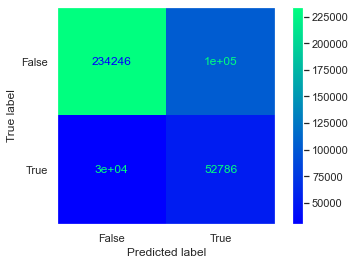

In [9]:
get_metrics(log,log_pred,log_probs)

Clearly more features are needed for better predictions.  I add in all features that have an impact on percentage of flights delayed according to the EDA.

I also play around with the threshold to try and massage the balance between precision and recall along the ROC curve.

In [10]:
features = ['snow_orig','previous_delay','precip_orig','distance','airport_delayed','airline_delayed','hour_delayed','month_delayed',
            'weekday_delayed','model_delayed','engine_delayed','aircraft_delayed','min_temp_orig','avg_wind_orig']

F1 Score:  0.43474625511953857
AUC Score:  0.7310084915441253
              precision    recall  f1-score   support

       False       0.86      0.85      0.86    281353
        True       0.43      0.44      0.43     68954

    accuracy                           0.77    350307
   macro avg       0.64      0.65      0.65    350307
weighted avg       0.78      0.77      0.77    350307



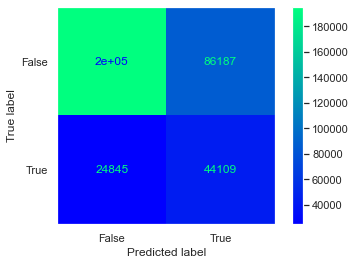

In [11]:
X = flights[features]
y = flights['delayed']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=23)
X_train_res, y_train_res = rus.fit_resample(X_train,y_train)

log = LogisticRegression().fit(X_train_res,y_train_res)
#pred = log.predict(X_test)
log_probs = log.predict_proba(X_test)[:,1]
log_pred = np.array([1 if p>.6 else 0 for p in log_probs])

get_metrics(log,log_pred,log_probs)

Now I try out polynomial features to see if that improves the score.

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score:  0.44226279300570487
AUC Score:  0.7365431736703998
              precision    recall  f1-score   support

       False       0.87      0.86      0.86    281753
        True       0.43      0.45      0.44     68554

    accuracy                           0.78    350307
   macro avg       0.65      0.65      0.65    350307
weighted avg       0.78      0.78      0.78    350307



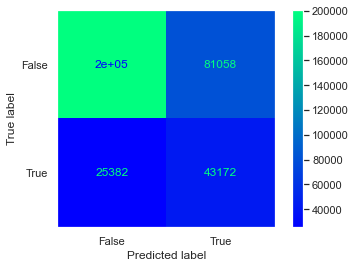

In [12]:
from sklearn.preprocessing import PolynomialFeatures
X = flights[features]
y = flights['delayed']

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25)

log = LogisticRegression(class_weight='balanced').fit(X_train,y_train)
#pred = log.predict(X_test)
log_probs = log.predict_proba(X_test)[:,1]
log_pred = np.array([1 if p>.6 else 0 for p in log_probs])

get_metrics(log,log_pred,log_probs)

Now I will try other models.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
#reset the features to be not scaled or polynomial because that doesn't matter to RF
X = flights[features]
y = flights['delayed']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

In [15]:
rf = RandomForestClassifier(class_weight='balanced').fit(X_train,y_train)
rf_probs = rf.predict_proba(X_test)[:,1]

F1 Score:  0.48750789946252365
AUC Score:  0.7628175790337774
              precision    recall  f1-score   support

       False       0.88      0.82      0.85    281353
        True       0.43      0.56      0.49     68954

    accuracy                           0.77    350307
   macro avg       0.66      0.69      0.67    350307
weighted avg       0.79      0.77      0.78    350307



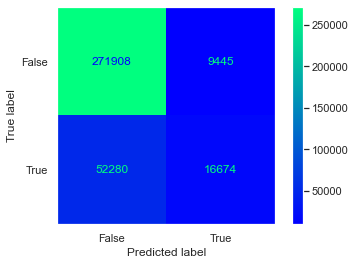

In [19]:
rf_pred = np.array([1 if p>.25 else 0 for p in rf_probs])

get_metrics(rf,rf_pred,rf_probs)

Random Forest is the best so far, but it is also the slowest model and may not be feasible in real time.

Next up: Naive Bayes

F1 Score:  0.3989405271336819
AUC Score:  0.7169987655236089
              precision    recall  f1-score   support

       False       0.85      0.87      0.86    281353
        True       0.42      0.38      0.40     68954

    accuracy                           0.78    350307
   macro avg       0.64      0.63      0.63    350307
weighted avg       0.77      0.78      0.77    350307



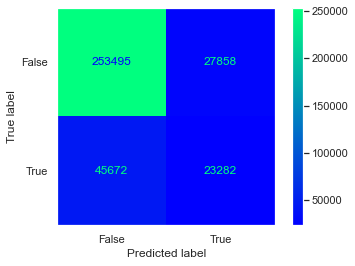

In [22]:
gnb = GaussianNB().fit(X_train,y_train)
gnb_probs = gnb.predict_proba(X_test)[:,1]
gnb_pred = np.array([1 if p>.25 else 0 for p in gnb_probs])

get_metrics(gnb,gnb_pred,gnb_probs)

In [16]:
#from sklearn.svm import SVC

#sv = SVC(class_weight='balanced').fit(X_train,y_train)
#sv_pred = sv.predict(X_test)

# svc too slow

In [17]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier().fit(X_train,y_train)
# knn_probs = knn.predict_proba(X_test)[:,1]
# knn_pred = np.array([1 if p>.2 else 0 for p in knn_probs])

#knn to slow

Both SVC and KNN ran far too slow for me to even get metrics on them.  Now I try XG Boost.  I will bring back the random undersampler because I can't find an equal class weights parameter in the algorithm.

In [23]:
import xgboost as xgb

In [24]:
X_train_res, y_train_res = rus.fit_resample(X_train,y_train)

boost = xgb.XGBClassifier(n_estimators=15,
                         max_depth=10,
                          gamma=1,
                         objective='binary:logistic',
                          max_delta_step=5,
                         learning_rate=0.2,
                         subsample=1,
                         min_child_weight=1,
                         colsample_bytree=.8)

eval_set=[(X_train_res,y_train_res),(X_test,y_test)]

fit_model = boost.fit(X_train,y_train,eval_set=eval_set,eval_metric='auc',
                     early_stopping_rounds=20,verbose=True)

[0]	validation_0-auc:0.70273	validation_1-auc:0.69771
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.74680	validation_1-auc:0.74022
[2]	validation_0-auc:0.75178	validation_1-auc:0.74435
[3]	validation_0-auc:0.75360	validation_1-auc:0.74653
[4]	validation_0-auc:0.75683	validation_1-auc:0.74857
[5]	validation_0-auc:0.75813	validation_1-auc:0.74933
[6]	validation_0-auc:0.75992	validation_1-auc:0.75070
[7]	validation_0-auc:0.76114	validation_1-auc:0.75166
[8]	validation_0-auc:0.76278	validation_1-auc:0.75305
[9]	validation_0-auc:0.76433	validation_1-auc:0.75428
[10]	validation_0-auc:0.76568	validation_1-auc:0.75514
[11]	validation_0-auc:0.76787	validation_1-auc:0.75646
[12]	validation_0-auc:0.76890	validation_1-auc:0.75686
[13]	validation_0-auc:0.76989	validation_1-auc:0.75719
[14]	validation_0-auc:0.77082	validation_1-auc:0.75745


In [29]:
boost_probs = boost.predict_proba(X_test)[:,1]
boost_pred = np.array([1 if p>0.25 else 0 for p in boost_probs])

F1 Score:  0.47546908199225846
AUC Score:  0.7574538095331469
              precision    recall  f1-score   support

       False       0.88      0.82      0.85    281353
        True       0.43      0.54      0.48     68954

    accuracy                           0.77    350307
   macro avg       0.65      0.68      0.66    350307
weighted avg       0.79      0.77      0.78    350307



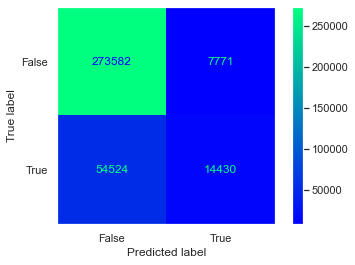

In [30]:
get_metrics(boost,boost_pred,boost_probs)

Here I attempted Bayesian Optimization to obtain the best Boost parameters, but I couldn't quite figure it out, so I resorted to manual parameter tuning.

In [52]:
from bayes_opt import BayesianOptimization

In [70]:
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)

def xgb_eval(max_depth,gamma,learning_rate,subsample,
             min_child_weight,colsample_bytree):
    
    params = {'eval_metric': 'auc',
              'max_depth': int(max_depth),
              'learning_rate': learning_rate,
              'min_child_weight': min_child_weight,
              'subsample': subsample,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3) 
    
    return cv_result

In [71]:
xgb_bo = BayesianOptimization(xgb_eval, {'max_depth': (3, 12), 
                                             'gamma': (0, 2),
                                             'colsample_bytree': (0.3, 0.9),
                                            'learning_rate': (0.1,0.5),
                                            'min_child_weight': (0.5,5),
                                            'subsample': (0.5,1),
                                            'colsample_bytree': (0.5,0.9)})

In [72]:
xgb_bo.maximize(init_points=10,n_iter=25,acq='ei')

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------


ValueError: cannot copy sequence with size 100 to array axis with dimension 4

Logistic AUC:  0.7310084915441253
Random Forest AUC:  0.7636436469914272
Gaussian Naive Bayes AUC:  0.7169987655236089
XG Boost AUC:  0.7574538095331469


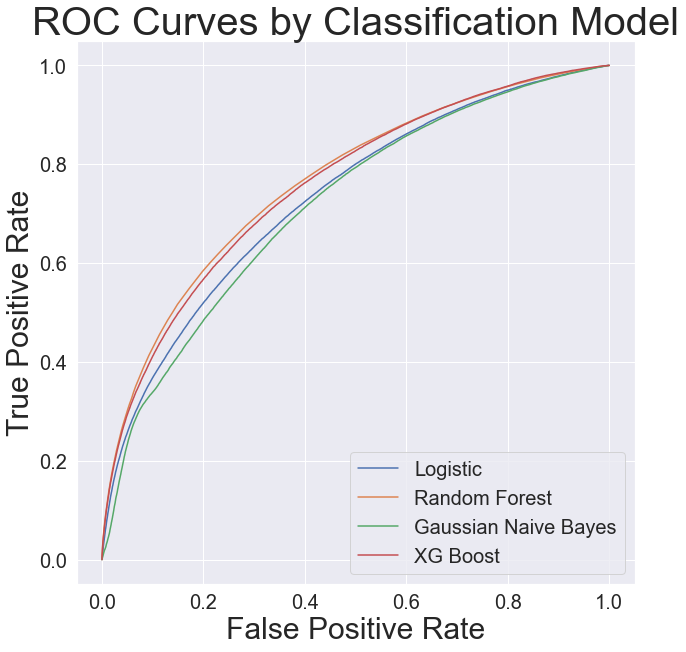

In [65]:
tpr_log, fpr_log, thresholds_log = metrics.roc_curve(y_test,log_probs)
tpr_rf, fpr_rf, thresholds_rf = metrics.roc_curve(y_test,rf_probs)
tpr_gnb, fpr_gnb, thresholds_gnb = metrics.roc_curve(y_test,gnb_probs)
tpr_boost, fpr_boost, thresholds_boost = metrics.roc_curve(y_test,boost_probs)

print('Logistic AUC: ',metrics.roc_auc_score(y_test,log_probs))
print('Random Forest AUC: ',metrics.roc_auc_score(y_test,rf_probs))
print('Gaussian Naive Bayes AUC: ',metrics.roc_auc_score(y_test,gnb_probs))
print('XG Boost AUC: ',metrics.roc_auc_score(y_test,boost_probs))

plt.figure(figsize=(10,10))
plt.plot(tpr_log,fpr_log,label='Logistic')
plt.plot(tpr_rf,fpr_rf,label='Random Forest')
plt.plot(tpr_gnb,fpr_gnb,label='Gaussian Naive Bayes')
plt.plot(tpr_boost,fpr_boost,label='XG Boost')
plt.title('ROC Curves by Classification Model',fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate',fontsize=30)
plt.ylabel('True Positive Rate',fontsize=30)
plt.legend(fontsize=20)
plt.savefig('images/model_selection.png',dpi=400);

Now I will run a correlation on each of the model's predictions to see if an ensemble method is warranted.

In [84]:
np.corrcoef(log_pred,rf_pred)

array([[1.       , 0.5580657],
       [0.5580657, 1.       ]])

In [85]:
np.corrcoef(log_pred,boost_pred)

array([[1.        , 0.50085743],
       [0.50085743, 1.        ]])

In [86]:
np.corrcoef(boost_pred,rf_pred)

array([[1.        , 0.50741009],
       [0.50741009, 1.        ]])

Our predictions are not highly correlated, so an ensemble method could help.  I will try a voting classifier.

In [89]:
from sklearn.ensemble import VotingClassifier

In [96]:
vc = VotingClassifier(estimators=[('lr',log),('rf',rf),('boost',boost)],voting='soft').fit(X_train,y_train)

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score:  0.43474625511953857
AUC Score:  0.7664395498195588
              precision    recall  f1-score   support

       False       0.86      0.85      0.86    281353
        True       0.43      0.44      0.43     68954

    accuracy                           0.77    350307
   macro avg       0.64      0.65      0.65    350307
weighted avg       0.78      0.77      0.77    350307



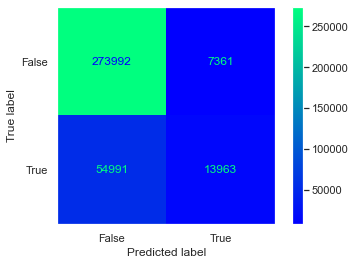

In [102]:
vc_probs = vc.predict_proba(X_test)[:,1]
vc_pred = np.array([1 if p>0.5 else 0 for p in vc_probs])

get_metrics(vc,vc_pred,vc_probs)

Okay so it's a *little* better but probably not worth the effort.